In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("incomeData.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# To find the datatypes of the features in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Id we want to find the mean, standard deviation, percentile values then we use describe()

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# To find whethere there is any null or NaN values

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [10]:
import seaborn as sns

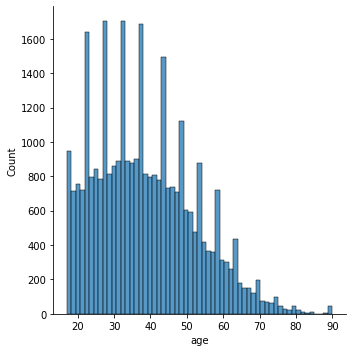

In [11]:
sns.displot(df.age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


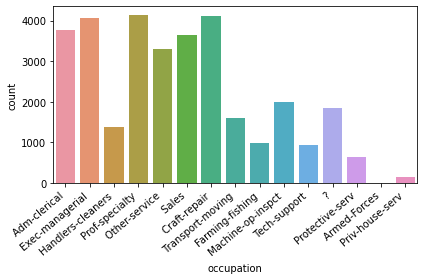

In [14]:
ax = sns.countplot(df.occupation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


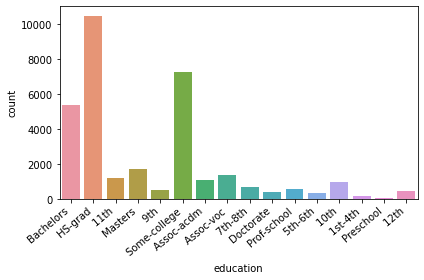

In [15]:
ax = sns.countplot(df.education)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [52]:
df['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [25]:
# Converting the object data types to integer data types

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['sex'] = le.fit_transform(df['sex'])

In [26]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K


In [31]:
# Identifying the feature importance by means of SHAP and XGBoost

import xgboost
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
df_X = df.drop(columns='Income', axis=0)
sc = StandardScaler()
fit_X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=df_X.columns)

In [38]:
y = df['Income']

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm_X, sm_y = sm.fit_resample(X,y)

In [59]:
sm_y.value_counts()

 <=50K    24720
 >50K     24720
Name: Income, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(sm_X, sm_y, test_size=0.3)

In [61]:
model_xgboost =  xgboost.XGBClassifier()

In [62]:
model_xgboost.fit(X_train, y_train)

XGBClassifier()

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix

In [64]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression()
KNR = KNeighborsClassifier()
GNB = GaussianNB()
SVC = SVC()

In [65]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
for i in [DTC, RFC, LR, KNR, GNB, SVC]:
  print("*****************************************")
  print(i)
  i.fit(X_train, y_train)
  y_pred = i.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print("*****************************************")


*****************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

       <=50K       0.85      0.84      0.85      7404
        >50K       0.84      0.86      0.85      7428

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832

[[6223 1181]
 [1060 6368]]
*****************************************
*****************************************
RandomForestClassifier()
              precision    recall  f1-score   support

       <=50K       0.91      0.88      0.89      7404
        >50K       0.88      0.91      0.90      7428

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

[[6518  886]
 [ 644 6784]]
*****************************************
*****************************************
LogisticRegression()
           